In [1]:
from pymongo import MongoClient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
client = MongoClient()
db = client.cleantech_db

In [3]:
col = db.tweets_collection

In [4]:
import spacy

In [5]:
nlp = spacy.load('en')

In [6]:
for user in col.find():
    doc = nlp(user['tweets_clean'])
    bag_of_words = ''
    for token in doc:
        if token.lemma_ == "\'s" or token.lemma_ == "|":
            continue
        if token.is_stop or token.is_space or token.is_punct or token.is_digit:
            continue
        elif token.is_ascii:
            bag_of_words += token.lemma_ + ' '
        else:
            continue
    col.update_one({'_id':user['_id']}, {'$set':{'bag_of_words': bag_of_words}})
            

In [7]:
col.find()[0]['bag_of_words']

'story cherry late guest daily thank diethylstilbestrol renewableenergy news story animalrights news solar eclipse emoticon story ny power authority twitter tour datum cente late organic daily late smm news caution protect pet look directly sun animal know better story talk science star outside late animal lover daily thank marketing bundestagswahl story pittsburgh i&p twitter pghdata release new da story bbc news world twitter final big ben chime ff unequaledtwitter blood hand turn blind eye animal cruelty south border universalhug solareclipse hug solareclipse solareclipse puppylogic solareclipse dog solareclipse story rhino horn auction story china lead clean energy charge planet late guest daily zerowaste morocco story come solar power sun eclipse bloomberg new en good morning lesson sunflower look happy monday godisgood faith late organic daily smm late late animal lover daily zahlungsverkehr kundenbeziehung late guest daily thank bpa india thank stlove v good night story leverage

### Create corpus from each document

In [8]:
corpus = []

In [9]:
for user in col.find():
    corpus.append(user['bag_of_words'])

In [10]:
len(corpus)

100

## Vectorization

First, start with Count Vectorizer

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
count_vectorizer = CountVectorizer(ngram_range=(1,2), min_df=5)

In [13]:
X_1 = count_vectorizer.fit_transform(corpus)

In [14]:
word_list = count_vectorizer.get_feature_names()

In [15]:
len(word_list)

53929

Next, vectorize with TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_df=0.97, min_df=5)

In [18]:
X_2 = tfidf_vectorizer.fit_transform(corpus)

In [19]:
word_list_2 = tfidf_vectorizer.get_feature_names()

In [20]:
len(word_list_2)

53684

## Dimensionality Reduction

#### Start off with LSA

First for Count Vectorizer tweets

In [21]:
from sklearn.decomposition import TruncatedSVD

In [43]:
lsa = TruncatedSVD(n_components=100, random_state=82117)
cv_matrix = lsa.fit_transform(X_1)

In [44]:
explained_variance_ratio = lsa.explained_variance_ratio_

In [45]:
sum_ratio = 0
sum_list = []
for index, ratio in enumerate(explained_variance_ratio):
    sum_ratio += ratio
    sum_list.append(sum_ratio)
    if sum_ratio > 0.95:
        print(index)
        break

45


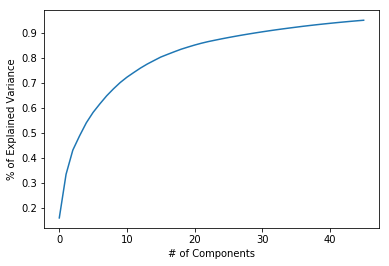

In [46]:
plt.plot(np.arange(46),sum_list)
plt.xlabel('# of Components')
plt.ylabel('% of Explained Variance')

In [2059]:
lsa_new = TruncatedSVD(n_components=30, random_state=82117)
cv_matrix_new= lsa_new.fit_transform(X_1)

In [2060]:
explained_variance_ratio = lsa_new.explained_variance_ratio_

In [147]:
components = lsa_new.components_

In [148]:
components.shape

(30, 53929)

In [149]:
words_in_component = []
for component in components:
    word_indices = (-component).argsort()[:10]
    words_in_component.append([word_list[word_index] for word_index in word_indices])

In [150]:
print(words_in_component)

[['climate', 'energy', 'solar', 'renewable', 'be', 'new', 'power', 'change', 'trump', 'coal'], ['solar', 'energy', 'solar energy', 'power', 'renewable', 'wind', 'pv', 'solar power', 'storage', 'renewable energy'], ['climate', 'solar', 'solar energy', 'climate change', 'energy', 'change', 'renewabl', 'climate renewabl', 'change climate', 'corruption'], ['solar', 'cdnpoli', 'trump', 'actonclimate', 'nokxl', 'pipeline', 'auspol', 'coal', 'nodapl', 'stopkm'], ['auspol', 'coal', 'stopadani', 'adani', 'australia', 'springst', 'qldpol', 'ht', 'govt', 'renewable'], ['cdnpoli', 'actonclimate', 'renewable', 'nokxl', 'cop', 'pipeline', 'stopkm', 'nodapl', 'waterislife', 'coal'], ['co', 'green', 'eco', 'uk', 'renewable', 'warm', 'nature', 'carbon', 'wind', 'poll'], ['story', 'late', 'daily', 'thank', 'daily thank', 'news', 'solar', 'twitter', 'organic', 'animal'], ['story', 'late', 'daily', 'uk', 'renewable', 'energy', 'daily thank', 'trump', 'say', 'nuclear'], ['energy', 'co', 'solar energy', 'ec

Now, TF-IDF tweets

In [53]:
lsa_tfidf = TruncatedSVD(n_components=100, random_state=82117)

In [54]:
tfidf_matrix = lsa_tfidf.fit_transform(X_2)

In [55]:
explained_variance_ratio = lsa_tfidf.explained_variance_ratio_

In [56]:
sum_ratio = 0
sum_list = []
for index, ratio in enumerate(explained_variance_ratio):
    sum_ratio += ratio
    sum_list.append(sum_ratio)
    if sum_ratio > 0.95:
        print(index)
        break

82


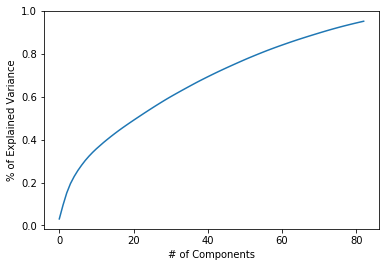

In [57]:
plt.plot(np.arange(83),sum_list)
plt.xlabel('# of Components')
plt.ylabel('% of Explained Variance')

In [58]:
lsa_tfidf_new = TruncatedSVD(n_components=82, random_state=82117)
tfidf_matrix_new = lsa_tfidf_new.fit_transform(X_2)

In [59]:
explained_variance_ratio = lsa_tfidf_new.explained_variance_ratio_

In [1331]:
components = lsa_tfidf_new.components_
components.shape

(82, 53684)

In [61]:
words_in_component = []
for component in components:
    word_indices = (-component).argsort()[:10]
    words_in_component.append([word_list[word_index] for word_index in word_indices])

In [62]:
print(words_in_component)

[['climate', 'energy', 'solar', 'renewable', 'be', 'new', 'power', 'change', 'trump', 'coal'], ['solar', 'energy', 'solar energy', 'power', 'renewable', 'wind', 'pv', 'solar power', 'storage', 'renewable energy'], ['climate', 'solar', 'solar energy', 'climate change', 'energy', 'change', 'renewabl', 'climate renewabl', 'change climate', 'corruption'], ['solar', 'cdnpoli', 'trump', 'actonclimate', 'nokxl', 'pipeline', 'auspol', 'coal', 'nodapl', 'stopkm'], ['auspol', 'coal', 'stopadani', 'adani', 'australia', 'springst', 'qldpol', 'ht', 'govt', 'renewable'], ['cdnpoli', 'actonclimate', 'renewable', 'nokxl', 'cop', 'pipeline', 'stopkm', 'nodapl', 'waterislife', 'coal'], ['co', 'green', 'eco', 'uk', 'renewable', 'warm', 'nature', 'carbon', 'wind', 'poll'], ['story', 'late', 'daily', 'thank', 'daily thank', 'news', 'solar', 'twitter', 'organic', 'animal'], ['story', 'late', 'daily', 'uk', 'renewable', 'energy', 'daily thank', 'trump', 'say', 'nuclear'], ['energy', 'co', 'solar energy', 'ec

#### Now dimensionality reduction with LDA

In [365]:
from gensim import models, similarities, matutils

In [381]:
term_doc_matrix = X_2.transpose()

In [382]:
corpus_gensim = matutils.Sparse2Corpus(term_doc_matrix)

In [383]:
id2word = dict((v, k) for k, v in tfidf_vectorizer.vocabulary_.items())

In [384]:
len(id2word)

53684

In [1327]:
lda_45 = models.LdaModel(corpus=corpus_gensim, num_topics=40, id2word=id2word, passes=10)

/usr/local/lib/python3.5/dist-packages/gensim/models/ldamodel.py:529: RuntimeWarning: overflow encountered in exp2
  (perwordbound, np.exp2(-perwordbound), len(chunk), corpus_words))


In [1329]:
lda_45.print_topics()

[(22,
  '0.000*"ces" + 0.000*"ibm" + 0.000*"uspoli" + 0.000*"sap" + 0.000*"hoursofreality" + 0.000*"electionnight" + 0.000*"analytics" + 0.000*"ml" + 0.000*"leonardo" + 0.000*"great cartoon"'),
 (3,
  '0.000*"greenpeace" + 0.000*"oilspill" + 0.000*"sandy" + 0.000*"oil spill" + 0.000*"piracy" + 0.000*"romney" + 0.000*"sotu" + 0.000*"ercot" + 0.000*"nj" + 0.000*"greenpeace activist"'),
 (12,
  '0.001*"community" + 0.001*"canada" + 0.001*"scientist" + 0.001*"farm" + 0.001*"technology" + 0.001*"africa" + 0.001*"innovation" + 0.001*"woman" + 0.001*"law" + 0.001*"budget"'),
 (16,
  '0.000*"chart day" + 0.000*"ace" + 0.000*"postal survey" + 0.000*"foxtel" + 0.000*"uhlmann" + 0.000*"sa battery" + 0.000*"lilley" + 0.000*"abs" + 0.000*"marriage postal" + 0.000*"test centre"'),
 (20,
  '0.000*"cleangrowth" + 0.000*"cdnpoli" + 0.000*"bcpoli cdnpoli" + 0.000*"recitie" + 0.000*"skpoli" + 0.000*"say cdnpoli" + 0.000*"canada cdnpoli" + 0.000*"gas ban" + 0.000*"cdnpoli great" + 0.000*"energy cdnpoli"')

In [375]:
lda_corpus = lda[corpus_gensim]
lda_corpus

In [376]:
lda_docs = [doc for doc in lda_corpus]

In [377]:
lda_docs[0:15]

[[(0, 0.026714823874474537),
  (1, 0.94657374026597774),
  (2, 0.026711435859547585)],
 [(0, 0.024084967791993241),
  (1, 0.95180323017249557),
  (2, 0.024111802035511231)],
 [(0, 0.013141802805741565),
  (1, 0.97371301809436439),
  (2, 0.0131451790998942)],
 [(1, 0.98484549695683288)],
 [(0, 0.021356055366471411),
  (1, 0.95727699110566233),
  (2, 0.021366953527866273)],
 [(0, 0.014820657915505278),
  (1, 0.97035813157315054),
  (2, 0.014821210511344185)],
 [(1, 0.98370454098751237)],
 [(0, 0.014002258184604219),
  (1, 0.97199405215228263),
  (2, 0.014003689663113229)],
 [(1, 0.9863321415203099)],
 [(1, 0.98522469881382502)],
 [(1, 0.9852149930860723)],
 [(0, 0.01728765214513794),
  (1, 0.96542729615734879),
  (2, 0.017285051697513178)],
 [(0, 0.016521761625179529),
  (1, 0.96695261758022644),
  (2, 0.016525620794593996)],
 [(0, 0.012170580000269932),
  (1, 0.97565992335207385),
  (2, 0.0121694966476562)],
 [(1, 0.98699709610408115)]]

Maybe sklearn would work better

In [387]:
from sklearn.decomposition import LatentDirichletAllocation

In [388]:
lda_skl_3 = LatentDirichletAllocation(n_components=3)
lda_skl_5 = LatentDirichletAllocation(n_components=5)
lda_skl_8 = LatentDirichletAllocation(n_components=8)
lda_skl_15 = LatentDirichletAllocation(n_components=15)
lda_skl_30 = LatentDirichletAllocation(n_components=30)
lda_skl_45 = LatentDirichletAllocation(n_components=45)
lda_skl_60 = LatentDirichletAllocation(n_components=60)

In [494]:
lda_skl_3.components_

array([[ 0.46869759,  0.50753337,  0.49351988, ...,  0.50143017,
         0.47002423,  0.48004723],
       [ 0.46050561,  0.44474565,  0.46710825, ...,  0.47350153,
         0.4793845 ,  0.4592739 ],
       [ 0.49285768,  0.4450995 ,  0.45398105, ...,  0.44163211,
         0.45480432,  0.47274256]])

In [1284]:
lda_matrix_3 = lda_skl_3.fit_transform(X_1)
lda_matrix_5 = lda_skl_5.fit_transform(X_1)
lda_matrix_8 = lda_skl_8.fit_transform(X_1)
lda_matrix_15 = lda_skl_15.fit_transform(X_1)
lda_matrix_30 = lda_skl_30.fit_transform(X_1)
lda_matrix_45 = lda_skl_45.fit_transform(X_1)
lda_matrix_60 = lda_skl_60.fit_transform(X_1)

/usr/local/lib/python3.5/dist-packages/sklearn/decomposition/online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/decomposition/online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/decomposition/online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/decomposition/online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning wa

# Clustering

## Kmeans

In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [604]:
#function to get inertia and silhouette score given a matrix
def get_inertia_sil(matrix):
    inertia = []
    sil_coefs = []
    for k in np.arange(2,20):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(matrix)
        labels = kmeans.labels_
        sil_coefs.append(silhouette_score(matrix, labels, metric='euclidean'))
        inertia.append(kmeans.inertia_)
    
    return inertia, sil_coefs

#### Count Vectorizer with LSA

In [605]:
inertia_cv, sil_coefs_cv = get_inertia_sil(cv_matrix_new)

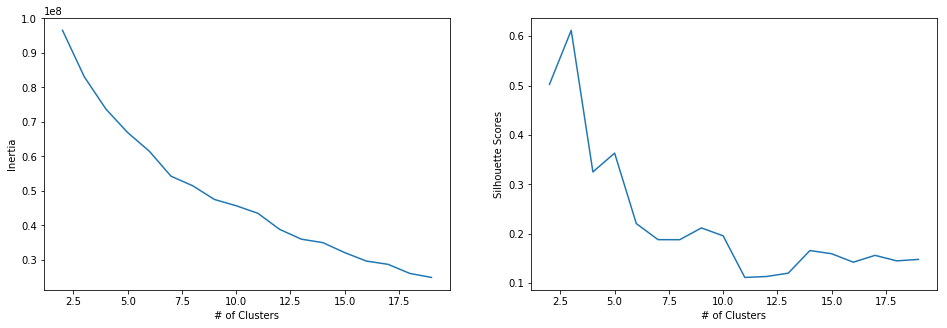

In [606]:
plt.subplots(1,2,figsize=(16,5))
plt.subplot(121)
plt.plot(np.arange(2,20),inertia_cv)
plt.xlabel('# of Clusters')
plt.ylabel('Inertia')
plt.subplot(122)
plt.plot(np.arange(2,20), sil_coefs_cv)
plt.xlabel('# of Clusters')
plt.ylabel('Silhouette Scores')

In [1320]:
n = 5
kmeans = KMeans(n_clusters=n, random_state=82117)
kmeans.fit(cv_matrix_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=82117, tol=0.0001, verbose=0)

In [1321]:
pred_cluster = kmeans.fit_predict(cv_matrix_new)
user_cluster = pd.DataFrame(columns=['user', 'cluster'])

In [1322]:
for index in range(col.count()):
    user_cluster = user_cluster.append(pd.DataFrame([[col.find()[index]['user'], pred_cluster[index]]], columns = ['user', 'cluster']))

In [1323]:
user_cluster['cluster'].value_counts()

4    49
0    38
3    11
2     1
1     1
Name: cluster, dtype: int64

In [1324]:
#find most common words of each cluster
df = pd.DataFrame(X_1.toarray(), columns=word_list)
df['Cluster'] = np.array(user_cluster['cluster'])
word_freq = df.groupby('Cluster').sum()

In [1325]:
word_freq.iloc[4,:].sort_values(ascending=False).head(10)

be         9995
trump      8617
not        5747
climate    5304
energy     5193
new        4677
good       3878
people     3574
say        3180
year       3016
Name: 4, dtype: int64

Clusters look okay, but the few outliers look like it can be improved

#### TF-IDF with LSA

In [659]:
inertia_tfidf_lsa, sil_coefs_tfidf_lsa = get_inertia_sil(tfidf_matrix_new)

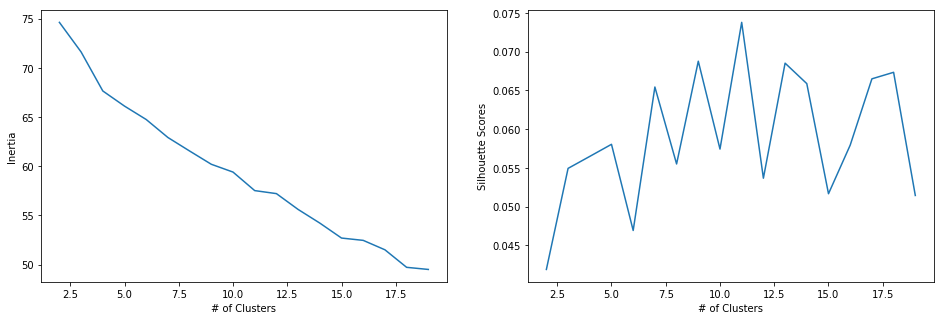

In [660]:
plt.subplots(1,2,figsize=(16,5))
plt.subplot(121)
plt.plot(np.arange(2,20),inertia_tfidf_lsa)
plt.xlabel('# of Clusters')
plt.ylabel('Inertia')
plt.subplot(122)
plt.plot(np.arange(2,20), sil_coefs_tfidf_lsa)
plt.xlabel('# of Clusters')
plt.ylabel('Silhouette Scores')

In [1417]:
n = 5
kmeans = KMeans(n_clusters=n, random_state=82117)
kmeans.fit(tfidf_matrix_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=82117, tol=0.0001, verbose=0)

In [1418]:
pred_cluster = kmeans.fit_predict(tfidf_matrix_new)
user_cluster = pd.DataFrame(columns=['user', 'cluster'])

In [1419]:
for index in range(col.count()):
    user_cluster = user_cluster.append(pd.DataFrame([[col.find()[index]['user'], pred_cluster[index]]], columns = ['user', 'cluster']))

In [1420]:
user_cluster['cluster'].value_counts()

4    33
1    30
3    18
0    11
2     8
Name: cluster, dtype: int64

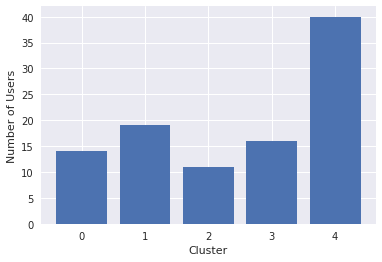

In [2081]:
plt.bar([4,1,3,0,2],user_cluster['cluster'].value_counts())
plt.xlabel('Cluster')
plt.ylabel('Number of Users')

In [1421]:
# find most common words of each cluster
df = pd.DataFrame(X_2.toarray(), columns=word_list_2)
df['Cluster'] = np.array(user_cluster['cluster'])
word_freq = df.groupby('Cluster').sum()

In [1422]:
word_freq.iloc[4,:].sort_values(ascending=False).head(10)

nuclear    3.890069
uk         3.289623
trump      2.778940
brexit     2.140777
solar      1.986453
oil        1.723943
cdnpoli    1.665462
hinkley    1.440372
eu         1.359086
paris      1.224522
Name: 4, dtype: float64

#### Count Vectorizer with LDA

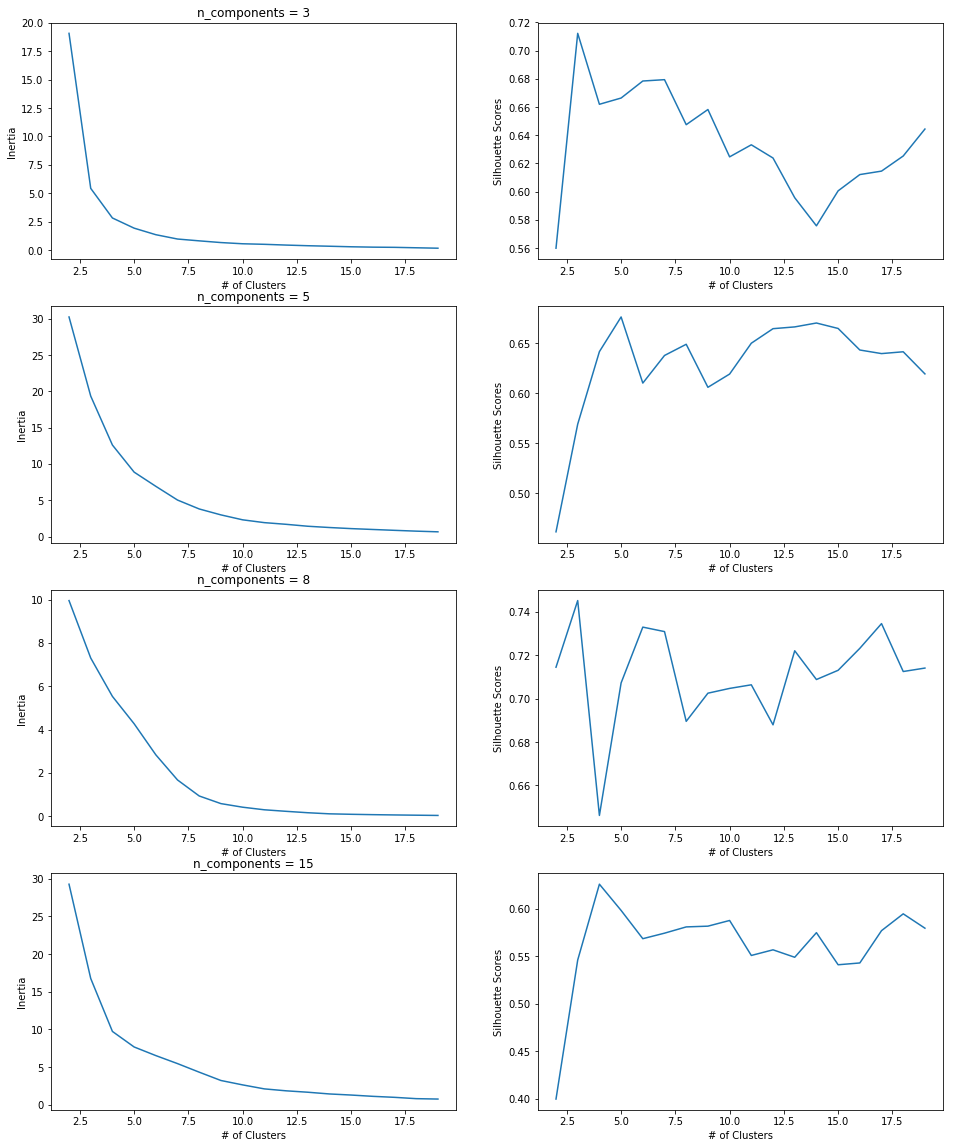

In [1293]:
inertia_3, sil_coefs_3 = get_inertia_sil(lda_matrix_3)
inertia_5, sil_coefs_5 = get_inertia_sil(lda_matrix_5)
inertia_8, sil_coefs_8 = get_inertia_sil(lda_matrix_8)
inertia_15, sil_coefs_15 = get_inertia_sil(lda_matrix_15)
inertia_30, sil_coefs_30 = get_inertia_sil(lda_matrix_30)
inertia_45, sil_coefs_45 = get_inertia_sil(lda_matrix_45)
inertia_60, sil_coefs_60 = get_inertia_sil(lda_matrix_60)

plt.subplots(4,2,figsize=(16,20))
plt.subplot(421)
plt.plot(np.arange(2,20),inertia_3)
plt.xlabel('# of Clusters')
plt.ylabel('Inertia')
plt.title('n_components = 3')
plt.subplot(422)
plt.plot(np.arange(2,20), sil_coefs_3)
plt.xlabel('# of Clusters')
plt.ylabel('Silhouette Scores')
plt.subplot(423)
plt.plot(np.arange(2,20),inertia_15)
plt.xlabel('# of Clusters')
plt.ylabel('Inertia')
plt.title('n_components = 5')
plt.subplot(424)
plt.plot(np.arange(2,20), sil_coefs_15)
plt.xlabel('# of Clusters')
plt.ylabel('Silhouette Scores')
plt.subplot(425)
plt.plot(np.arange(2,20),inertia_30)
plt.xlabel('# of Clusters')
plt.ylabel('Inertia')
plt.title('n_components = 8')
plt.subplot(426)
plt.plot(np.arange(2,20), sil_coefs_30)
plt.xlabel('# of Clusters')
plt.ylabel('Silhouette Scores')
plt.subplot(427)
plt.plot(np.arange(2,20),inertia_45)
plt.xlabel('# of Clusters')
plt.ylabel('Inertia')
plt.title('n_components = 15')
plt.subplot(428)
plt.plot(np.arange(2,20), sil_coefs_45)
plt.xlabel('# of Clusters')
plt.ylabel('Silhouette Scores')

In [1313]:
n = 5
kmeans = KMeans(n_clusters=n, random_state=82117)
kmeans.fit(lda_matrix_45)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=82117, tol=0.0001, verbose=0)

In [1314]:
pred_cluster = kmeans.fit_predict(lda_matrix_45)
user_cluster = pd.DataFrame(columns=['user', 'cluster'])

In [1315]:
for index in range(col.count()):
    user_cluster = user_cluster.append(pd.DataFrame([[col.find()[index]['user'], pred_cluster[index]]], columns = ['user', 'cluster']))

In [1316]:
user_cluster['cluster'].value_counts()

0    36
1    27
4    14
2    14
3     9
Name: cluster, dtype: int64

In [1317]:
#find most common words of each cluster
df_2 = pd.DataFrame(X_2.toarray(), columns=word_list_2)
df_2['Cluster'] = np.array(user_cluster['cluster'])
word_freq_2 = df_2.groupby('Cluster').sum()

In [1330]:
word_freq_2.iloc[4,:].sort_values(ascending=False).head(10)

solar               3.732421
energyunion         1.772826
eu                  1.553904
cop                 0.997688
renewable energy    0.892137
eusew               0.882072
de                  0.863399
energyefficiency    0.838940
solar energy        0.779823
gore                0.769862
Name: 4, dtype: float64

TF-IDF with LSA returned the most interpretable clusters

## Agglomerative

In [742]:
from sklearn.cluster import AgglomerativeClustering

In [821]:
n = 5
agg_model = AgglomerativeClustering(n_clusters = n, affinity = 'euclidean', linkage='ward')

In [822]:
agg_model.fit(tfidf_matrix_new)
pred_cluster_agg = agg_model.fit_predict(tfidf_matrix_new)
user_cluster_agg = pd.DataFrame(columns=['user', 'cluster'])

In [823]:
for index in range(col.count()):
    user_cluster_agg = user_cluster_agg.append(pd.DataFrame([[col.find()[index]['user'], pred_cluster_agg[index]]], columns = ['user', 'cluster']))

In [824]:
user_cluster_agg['cluster'].value_counts()

0    41
1    20
3    18
2    13
4     8
Name: cluster, dtype: int64

In [825]:
#find most common words of each cluster
df_3 = pd.DataFrame(X_2.toarray(), columns=word_list_2)
df_3['Cluster'] = np.array(user_cluster_agg['cluster'])
word_freq_3 = df_3.groupby('Cluster').sum()

In [826]:
word_freq_3.iloc[4,:].sort_values(ascending=False).head(10)

uk          2.589812
trump       1.617465
brexit      1.475008
hinkley     1.342619
icym        1.066592
eu          0.922458
nuclear     0.848976
solar       0.783073
paris       0.774780
emission    0.717741
Name: 4, dtype: float64

## DBSCAN Clustering

In [827]:
from sklearn.cluster import DBSCAN

In [1137]:
eps= 0.89
dbscan_model = DBSCAN(eps=eps, algorithm= 'kd_tree', min_samples=3)

In [1138]:
dbscan_model.fit(tfidf_matrix_new)

DBSCAN(algorithm='kd_tree', eps=0.89, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=1, p=None)

In [1139]:
pred_cluster_dbscan = dbscan_model.fit_predict(tfidf_matrix_new)
user_cluster_dbscan = pd.DataFrame(columns=['user', 'cluster'])

In [1140]:
pred_cluster_dbscan

array([-1, -1, -1,  0, -1, -1,  0, -1, -1,  1,  0,  0, -1, -1,  0,  0,  1,
        0, -1,  1,  0, -1,  0, -1, -1, -1, -1, -1,  1, -1, -1, -1,  0, -1,
       -1, -1,  0,  1,  1, -1,  0,  0,  0, -1, -1, -1, -1,  1, -1, -1,  0,
       -1,  0,  0, -1,  0,  0, -1,  0, -1, -1, -1,  2, -1,  0, -1,  0, -1,
       -1,  0,  0,  0, -1, -1,  2,  0, -1, -1, -1, -1,  0, -1, -1,  0, -1,
        0,  0, -1,  0, -1,  0,  0, -1, -1,  1,  2,  0, -1, -1,  0])

In [1141]:
for index in range(col.count()):
    user_cluster_dbscan = user_cluster_dbscan.append(pd.DataFrame([[col.find()[index]['user'], pred_cluster_dbscan[index]]], columns = ['user', 'cluster']))
    

In [1142]:
user_cluster_dbscan['cluster'].value_counts()

-1    54
 0    35
 1     8
 2     3
Name: cluster, dtype: int64

In [2058]:
db.individual_tweets.find_one({'user':'StollmeyerEU'})

{'_id': ObjectId('599e267f6d241827c415473b'),
 'individual_tweets': ["RT @StollmeyerEU: BREAKING: Prominent Rabbis ditch High Holy Days call with Trump, citing 'lack of moral leadership'.\n\n#HeatherHeyer\n https…",
  'RT @StollmeyerEU: Seeing what is happening in e.g. US🇺🇸, in Russia🇷🇺 &amp; in Turkey🇹🇷 I am *so* grateful to be a citizen of the EU🇪🇺.\n\n#NeverF…',
  "RT @StollmeyerEU: Ex Intel Dir questions Trump's fitness for office &amp; worries about national security.\n\n#PhoenixRally #25thAmendment\n https…",
  'Zero-sum beliefs are undermining progress toward equal rights. Be it for gender or colour.\n\nTHREAD ⬇️ https://t.co/85UXCidLJl',
  '🇩🇪Chancellor Merkel: \n\n‘For America🇺🇸 to be great, it cannot just care about itself.’\n\n#MAGA #TransAtlantic #global\n https://t.co/5wKFMA6XG2',
  'RT @MattAsherS: @StollmeyerEU Good for them! There is no room in America for anti-semitism, racial hatred and white supremacism.\n\nI wish Tr…',
  "BREAKING: Prominent Rabbis ditch High Holy D

# Visualization

## Word Cloud

First with Kmeans clustering

In [1902]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from os import path
import random

In [668]:
col.find_one({'user':'JuneStoyer'})['bag_of_words']

'story cherry late guest daily thank diethylstilbestrol renewableenergy news story animalrights news solar eclipse emoticon story ny power authority twitter tour datum cente late organic daily late smm news caution protect pet look directly sun animal know better story talk science star outside late animal lover daily thank marketing bundestagswahl story pittsburgh i&p twitter pghdata release new da story bbc news world twitter final big ben chime ff unequaledtwitter blood hand turn blind eye animal cruelty south border universalhug solareclipse hug solareclipse solareclipse puppylogic solareclipse dog solareclipse story rhino horn auction story china lead clean energy charge planet late guest daily zerowaste morocco story come solar power sun eclipse bloomberg new en good morning lesson sunflower look happy monday godisgood faith late organic daily smm late late animal lover daily zahlungsverkehr kundenbeziehung late guest daily thank bpa india thank stlove v good night story leverage

In [1146]:
top_words = word_freq.iloc[0,:].sort_values(ascending=False).head(20)

In [1147]:
top_words.index, top_words.values

(Index(['auspol', 'stopadani', 'adani', 'springst', 'turnbull', 'australia',
        'abbott', 'nsw', 'trump', 'lnp', 'qanda', 'labor', 'vret', 'qldpol',
        'ausvote', 'solar', 'climatechange', 'govt', 'australian', 'vic'],
       dtype='object'),
 array([ 4.40847213,  2.71833978,  1.76849069,  1.25387768,  0.97072459,
         0.91881131,  0.78119422,  0.70604003,  0.68358825,  0.63246731,
         0.60658669,  0.59065115,  0.58358051,  0.55217989,  0.54504458,
         0.52272262,  0.51256442,  0.51132962,  0.4967898 ,  0.43330383]))

In [1148]:
top_words[top_words.index[0]]

4.4084721334141452

In [1149]:
#function to get top words and TF-IDF frequency from LSA
def top_words(wf, index, n=20):
    words = wf.iloc[index,:].sort_values(ascending = False).head(n)
    return words.index, words.values

In [1150]:
#function to generate text based on TF-IDF for word cloud
def generate_cloudtext(words, values):
    text = ''
    for index in range(len(words)):
        for count in range(int(10*values[index])):
            text += words[index] + ' '
    return text

In [1151]:
top_words0, top_values0 = top_words(word_freq, 0)
top_words1, top_values1 = top_words(word_freq, 1)
top_words2, top_values2 = top_words(word_freq, 2)
top_words3, top_values3 = top_words(word_freq, 3)
top_words4, top_values4 = top_words(word_freq, 4)

cloud_text0 = generate_cloudtext(top_words0, top_values0)
cloud_text1 = generate_cloudtext(top_words1, top_values1)
cloud_text2 = generate_cloudtext(top_words2, top_values2)
cloud_text3 = generate_cloudtext(top_words3, top_values3)
cloud_text4 = generate_cloudtext(top_words4, top_values4)

In [1152]:
text0 =''
for i in user_cluster[user_cluster.cluster == 0]['user'].values:
    bag_of_words = col.find_one({'user': i})['bag_of_words']
    text0 += bag_of_words

text1 = ''
for i in user_cluster[user_cluster.cluster == 1]['user'].values:
    bag_of_words = col.find_one({'user': i})['bag_of_words']
    text1 += bag_of_words

text2 =''
for i in user_cluster[user_cluster.cluster == 2]['user'].values:
    bag_of_words = col.find_one({'user': i})['bag_of_words']
    text2 += bag_of_words
    
text3 =''
for i in user_cluster[user_cluster.cluster == 3]['user'].values:
    bag_of_words = col.find_one({'user': i})['bag_of_words']
    text3 += bag_of_words

text4 =''
for i in user_cluster[user_cluster.cluster == 4]['user'].values:
    bag_of_words = col.find_one({'user': i})['bag_of_words']
    text4 += bag_of_words

In [2123]:
#set image mask
mask0 = np.array(Image.open('kangaroo.jpg'))
mask1 = np.array(Image.open('sun.png'))
mask2 = np.array(Image.open('europe.png'))
mask3 = np.array(Image.open('trump.png'))
mask4 = np.array(Image.open('nuclear.png'))

In [2124]:
#set stopwords
cloud_stopwords = set(STOPWORDS)
cloud_stopwords.add('say')
cloud_stopwords.add('new')

wordcloud0 = WordCloud(width=800, height=600, mask = mask0, relative_scaling = 1.0, max_words=500, background_color='white',
                      stopwords = cloud_stopwords, colormap='gnuplot' # set or space-separated string
                      ).generate(text0)
wordcloud1 = WordCloud(width=800, height=600, mask = mask1, relative_scaling = 1.0, max_words=200, background_color='white',
                      stopwords = cloud_stopwords, colormap='brg' # set or space-separated string
                      ).generate(text1)
wordcloud2 = WordCloud(width=800, height=600, mask = mask2, relative_scaling = 1.0, max_words=500, background_color='white',
                      stopwords = cloud_stopwords # set or space-separated string
                      ).generate(text2)
wordcloud3 = WordCloud(width=800, height=600, mask = mask3, relative_scaling = 1.0, max_words=500, background_color='white',
                      stopwords = cloud_stopwords # set or space-separated string
                      ).generate(text3)
wordcloud4 = WordCloud(width=800, height=600, mask = mask4, relative_scaling = 1.0, max_words=500, background_color='white',
                      stopwords = cloud_stopwords # set or space-separated string
                      ).generate(text4)

(-0.5, 499.5, 349.5, -0.5)

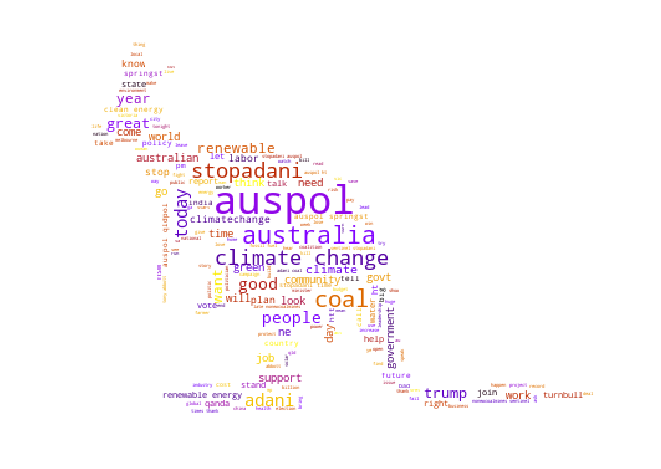

In [2127]:
plt.subplots(1,1,figsize=(12,8))
plt.imshow(wordcloud0)
# plt.title("Australian Black Lung", fontsize=24)
plt.axis("off")

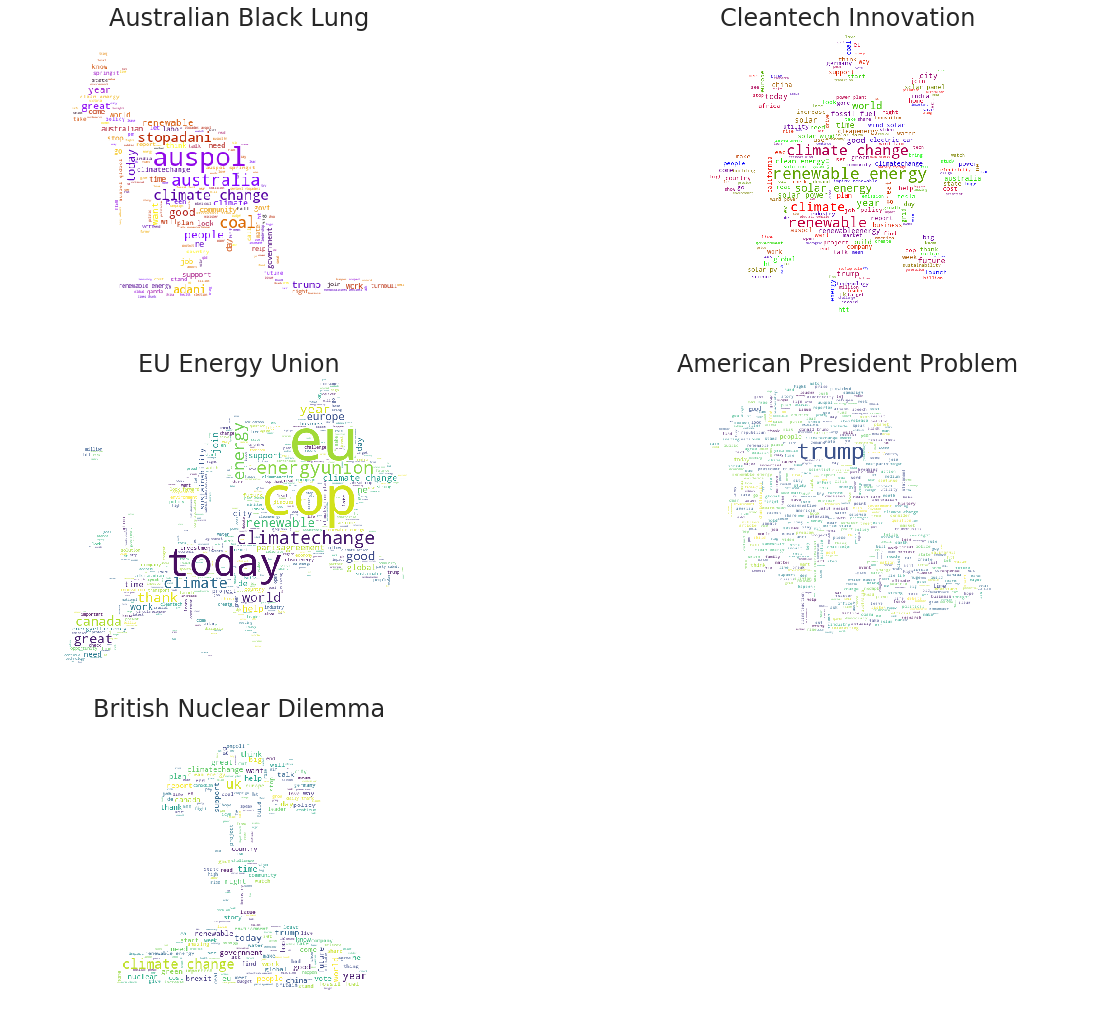

In [2126]:
plt.subplots(3,2, figsize=(20, 18))
plt.subplot(321)
plt.imshow(wordcloud0.recolor())
plt.title("Australian Black Lung", fontsize=24)
plt.axis("off")
plt.subplot(322)
plt.imshow(wordcloud1.recolor())
plt.title("Cleantech Innovation", fontsize=24)
plt.axis("off")
plt.subplot(323)
plt.imshow(wordcloud2.recolor())
plt.title("EU Energy Union", fontsize=24)
plt.axis("off")
plt.subplot(324)
plt.imshow(wordcloud3.recolor())
plt.title("American President Problem", fontsize=24)
plt.axis("off")
plt.subplot(325)
plt.imshow(wordcloud4.recolor())
plt.title("British Nuclear Dilemma", fontsize=24)
plt.axis("off")
plt.subplot(326)
plt.axis("off")
plt.show()

Agglomerative Clustering

In [1163]:
text0 =''
for i in user_cluster[user_cluster.cluster == 0]['user'].values:
    bag_of_words = col.find_one({'user': i})['bag_of_words']
    text0 += bag_of_words

text1 = ''
for i in user_cluster[user_cluster.cluster == 1]['user'].values:
    bag_of_words = col.find_one({'user': i})['bag_of_words']
    text1 += bag_of_words

text2 =''
for i in user_cluster[user_cluster.cluster == 2]['user'].values:
    bag_of_words = col.find_one({'user': i})['bag_of_words']
    text2 += bag_of_words
    
text3 =''
for i in user_cluster[user_cluster.cluster == 3]['user'].values:
    bag_of_words = col.find_one({'user': i})['bag_of_words']
    text3 += bag_of_words

text4 =''
for i in user_cluster[user_cluster.cluster == 4]['user'].values:
    bag_of_words = col.find_one({'user': i})['bag_of_words']
    text4 += bag_of_words

In [1164]:
cloud_stopwords = {'to', 'of', 'say', 'be', 'new', "climate change", "climate", "change", "not", "good", "time", "today", "year", "day",}
wordcloud0 = WordCloud(width=600, height=400, relative_scaling = 1.0, max_words=50, background_color='black',
                      stopwords = cloud_stopwords # set or space-separated string
                      ).generate(text0)
wordcloud1 = WordCloud(width=600, height=400, relative_scaling = 1.0, max_words=50, background_color='black',
                      stopwords = cloud_stopwords # set or space-separated string
                      ).generate(text1)
wordcloud2 = WordCloud(width=600, height=400, relative_scaling = 1.0, max_words=50, background_color='black',
                      stopwords = cloud_stopwords # set or space-separated string
                      ).generate(text2)
wordcloud3 = WordCloud(width=600, height=400, relative_scaling = 1.0, max_words=50, background_color='black',
                      stopwords = cloud_stopwords # set or space-separated string
                      ).generate(text3)
wordcloud4 = WordCloud(width=600, height=400, relative_scaling = 1.0, max_words=50, background_color='black',
                      stopwords = cloud_stopwords # set or space-separated string
                      ).generate(text4)

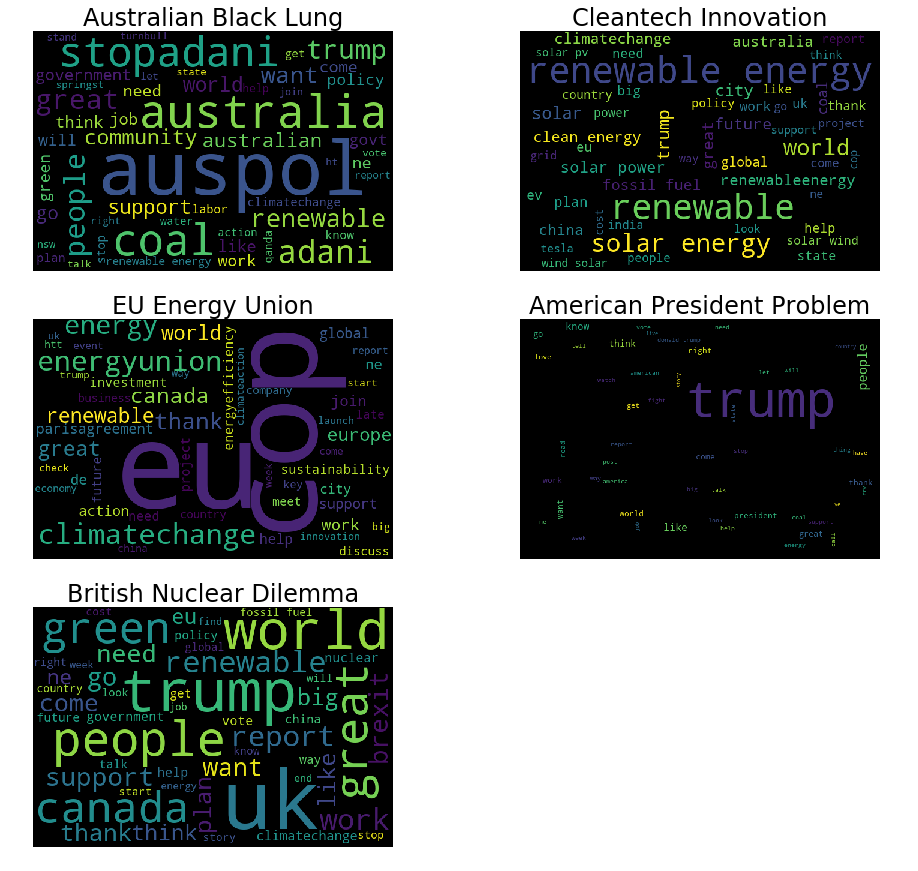

In [1165]:
plt.subplots(3,2, figsize=(16, 15))
plt.subplot(321)
plt.imshow(wordcloud0)
plt.title("Australian Black Lung", fontsize=24)
plt.axis("off")
plt.subplot(322)
plt.imshow(wordcloud1)
plt.title("Cleantech Innovation", fontsize=24)
plt.axis("off")
plt.subplot(323)
plt.imshow(wordcloud2)
plt.title("EU Energy Union", fontsize=24)
plt.axis("off")
plt.subplot(324)
plt.imshow(wordcloud3)
plt.title("American President Problem", fontsize=24)
plt.axis("off")
plt.subplot(325)
plt.imshow(wordcloud4)
plt.title("British Nuclear Dilemma", fontsize=24)
plt.axis("off")
plt.subplot(326)
plt.axis("off")
plt.show()

## 3D Plot of Clusters

#### Reduce dimensions to 3  first using LSA

In [1996]:
lsa_tfidf_3 = TruncatedSVD(n_components=3, random_state=82117)
tfidf_matrix_3 = lsa_tfidf_3.fit_transform(X_2)

In [1997]:
explained_variance_ratio = lsa_tfidf_3.explained_variance_ratio_
components_3 = lsa_tfidf_3.components_
components_3.shape

(3, 53684)

In [1998]:
words_in_component_3 = []
for component in components_3:
    word_indices = (-component).argsort()[:10]
    words_in_component_3.append([word_list[word_index] for word_index in word_indices])

In [2082]:
for i in words_in_component_3:
    print(i)

['small island', 'transmit', 'not stay', 'turbine big', 'aus not', 'ocean circulation', 'remain wild', 'electric black', 'elect represent', 'em come']
['transmit', 'aus not', 'weather map', 'charge ev', 'stay date', 'victorian', 'trump muslimban', 'sunglass', 'nation energy', 'web page']
['aus not', 'stay date', 'adam', 'aussi', 'speak say', 'small island', 'trump violate', 'not save', 'abbott', 'litmus']


In [2000]:
n = 5
kmeans = KMeans(n_clusters=n, random_state=82117)
kmeans.fit(tfidf_matrix_3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=82117, tol=0.0001, verbose=0)

In [2001]:
pred_cluster_3 = kmeans.fit_predict(tfidf_matrix_3)
user_cluster_3 = pd.DataFrame(columns=['user', 'cluster'])

In [2002]:
for index in range(col.count()):
    user_cluster_3 = user_cluster_3.append(pd.DataFrame([[col.find()[index]['user'], pred_cluster_3[index]]], columns = ['user', 'cluster']))

In [2003]:
user_cluster_3['cluster'].value_counts()

1    40
0    19
3    16
4    14
2    11
Name: cluster, dtype: int64

In [2004]:
import plotly.plotly as py
import plotly.graph_objs as go

In [2005]:
plotly.tools.set_credentials_file(username='kyz682', api_key='rn53KyvgSORgUYTGJkjZ')

In [2027]:
cluster_names = {0: 'Australian Black Lung',
                1: 'Cleantech Innovation',
                2: 'EU Energy Union',
                3: 'American President Problem',
                4: 'British Nuclear Dilemma'}

In [2006]:
#function to get data and layout for 3D scatter plot
def plot_3D(coord, cluster):
    trace = go.Scatter3d(
    x = coord[:,0],
    y = coord[:,1], 
    z = coord[:,2],
    mode='markers',
    marker=dict(
    size=12,
    color=cluster,                # set color to an array/list of desired values
    colorscale='Viridis',   # choose a colorscale
    opacity=0.8),
    text=hover_text,
    hoverinfo='text'
    )
    
    data = [trace]
    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    return data, layout


In [2028]:
def make_hover_text(pred_cluster, list_len, coord):
    hover_text = []
    for index in range(list_len):
        cluster = cluster_names[pred_cluster[index]]
        user = col.find()[index]['user']
        coordinates = coord[index]
        hover_text.append(('Name: {0} <br>'+ 
                           'Cluster: {1} <br>'+
                           'Coordinates: {2} <br>').format(user,cluster,coordinates))
    return hover_text

In [2029]:
hover_text = make_hover_text(pred_cluster_3, col.count(), tfidf_matrix_3)
data, layout = plot_3D(tfidf_matrix_3, user_cluster_3.cluster)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename='3d-scatter-colorscale')

# Sentiment Analysis

In [1423]:
top_words0, top_values0 = top_words(word_freq, 0)
top_words1, top_values1 = top_words(word_freq, 1)
top_words2, top_values2 = top_words(word_freq, 2)
top_words3, top_values3 = top_words(word_freq, 3)
top_words4, top_values4 = top_words(word_freq, 4)

In [1424]:
top_words0

Index(['auspol', 'stopadani', 'adani', 'springst', 'turnbull', 'australia',
       'abbott', 'nsw', 'trump', 'lnp', 'qanda', 'labor', 'vret', 'qldpol',
       'ausvote', 'solar', 'climatechange', 'govt', 'australian', 'vic'],
      dtype='object')

In [1426]:
top_words_col = db.top_words_collection

In [1427]:
top_words_col.insert_one({'Cluster_0':[w for w in top_words0]})
top_words_col.insert_one({'Cluster_1':[w for w in top_words1]})
top_words_col.insert_one({'Cluster_2':[w for w in top_words2]})
top_words_col.insert_one({'Cluster_3':[w for w in top_words3]})
top_words_col.insert_one({'Cluster_4':[w for w in top_words4]})

In [1428]:
list(top_words_col.find()[0].values())[0]

['auspol',
 'stopadani',
 'adani',
 'springst',
 'turnbull',
 'australia',
 'abbott',
 'nsw',
 'trump',
 'lnp',
 'qanda',
 'labor',
 'vret',
 'qldpol',
 'ausvote',
 'solar',
 'climatechange',
 'govt',
 'australian',
 'vic']

In [1619]:
cluster_0 = user_cluster[user_cluster.cluster == 0].user.values
cluster_1 = user_cluster[user_cluster.cluster == 1].user.values
cluster_2 = user_cluster[user_cluster.cluster == 2].user.values
cluster_3 = user_cluster[user_cluster.cluster == 3].user.values
cluster_4 = user_cluster[user_cluster.cluster == 4].user.values

In [1620]:
cluster_0

array(['ReclaimAnglesea', 'ChristineMilne', 'TheRealEwbank', 'vanbadham',
       'greensjeremy', 'TonyHWindsor', 'Mark_Butler_MP', 'takvera',
       'Green_Living1', 'ActOnClimate', 'Gareth_PanChem'], dtype=object)

In [1622]:
cluster_col = db.clusters_collection

In [1623]:
cluster_col.insert_one({'Cluster_0':[c for c in cluster_0]})
cluster_col.insert_one({'Cluster_1':[c for c in cluster_1]})
cluster_col.insert_one({'Cluster_2':[c for c in cluster_2]})
cluster_col.insert_one({'Cluster_3':[c for c in cluster_3]})
cluster_col.insert_one({'Cluster_4':[c for c in cluster_4]})

In [1624]:
# list(cluster_col.find()[0].values())[0]
cluster_col.find()[0]

{'Cluster_0': ['ReclaimAnglesea',
  'ChristineMilne',
  'TheRealEwbank',
  'vanbadham',
  'greensjeremy',
  'TonyHWindsor',
  'Mark_Butler_MP',
  'takvera',
  'Green_Living1',
  'ActOnClimate',
  'Gareth_PanChem'],
 '_id': ObjectId('599e47c76d241827a867512c')}

Now, find the tweets with the keywords and do sentiment analysis

In [1625]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [1626]:
indiv_col = db.individual_tweets
sentiment_col = db.sentiment_analysis

In [1817]:
#function that returns tweets with sentiment analysis given the user and keyword
def find_user_sentiment(user, keyword):
    
    sid = SentimentIntensityAnalyzer()
    tweet_scores = []
    
    for tweet in list(indiv_col.find_one({'user': user})['individual_tweets']):
        if keyword in tweet:
            ss = sid.polarity_scores(tweet)
            #remove completely neutral sentiments
            if ss['compound'] ==0:
                continue
            #if compound is positive but there are large amounts of negative, do not include
            if ss['compound'] > 0 and ss['neg'] > 0.2:
                continue
            #if compound is negative but there are large amounts of positive, do not include
            if ss['compound'] < 0 and ss['pos'] > 0.2:
                continue
            else:
                tweet_scores.append([tweet, ss])
#             print(tweet)
#             print(ss)
    
    return tweet_scores   

In [1818]:
#function that returns type of sentiment score for set of tweet scores
def get_scores(tweet_scores, score_type):
    
    scores = []
    
    for i in range(len(tweet_scores)):
        scores.append(tweet_scores[i][1][score_type])
    
    return scores

In [1819]:
scores = find_user_sentiment('ReclaimAnglesea','nuclear')

Select 3-5 keywords for each cluster to do sentiment analysis

In [1820]:
top_words_col.find()[0]

{'Cluster_0': ['auspol',
  'stopadani',
  'adani',
  'springst',
  'turnbull',
  'australia',
  'abbott',
  'nsw',
  'trump',
  'lnp',
  'qanda',
  'labor',
  'vret',
  'qldpol',
  'ausvote',
  'solar',
  'climatechange',
  'govt',
  'australian',
  'vic'],
 '_id': ObjectId('599e33ca6d241827a867511d')}

In [1821]:
word_analyze_0 = ['auspol', 'adani', 'stopadani', 'trump']
word_analyze_1 = ['solar', 'ev', 'batter', 'oil']
word_analyze_2 = ['cop', 'energyunion', 'climatechange', 'eusew']
word_analyze_3 = ['trump', 'gop', 'charlottesville', 'supremacist']
word_analyze_4 = ['nuclear', 'uk', 'brexit', 'solar', 'oil']

### Start sentiment analysis for each cluster

In [1822]:
cluster_col.find()[1].values()

dict_values([['energyenviro', 'MLiebreich', 'charlesb430', 'JigarShahDC', 'mzjacobson', 'AssaadRazzouk', 'ristori20', 'Sustainable2050', 'BrianVad', 'leahyparks', 'KetanJ0', 'Ken_Silverstein', 'ecopolitologist', 'CarlSiegrist', 'zshahan3', 'IgnacioMls', 'SimonCorbell', 'THEnergyNet', 'GilesParkinson', 'johnrhanger', 'jbiesenberger', 'AnnaLeidreiter', 'ArronWood', 'Bentler', 'elaineishere', 'ProfRayWills', 'JeremyLeggett', 'arikring', 'robertoglezcano', 'KYumkella'], ObjectId('599e47c76d241827a867512d')])

In [1823]:
#function to return sentiment given cluster number, keyword, and score type
def cluster_sentiment(n, keyword, score_type):

    sentiment = []
    if n == 2 or n==3:
        i = 1
    else:
        i = 0
    for user in list(cluster_col.find()[n].values())[i]:
        tweet_scores = find_user_sentiment(user, keyword)
        if tweet_scores != '':
            sentiment.extend(get_scores(tweet_scores, score_type))
    
    return sentiment

In [1824]:
import seaborn as sns

In [1825]:
tune = 0.25   #tune the kdeplots

Cluster 0

In [1826]:
sentiment_auspol_0 = cluster_sentiment(0, 'auspol', 'compound')
sentiment_adani_0 = cluster_sentiment(0, 'adani', 'compound')
sentiment_stopadani_0 = cluster_sentiment(0, 'stopadani','compound')

In [1827]:
import matplotlib.mlab as mlab

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:518: UserWarning:

You have mixed positional and keyword arguments, some input will be discarded.



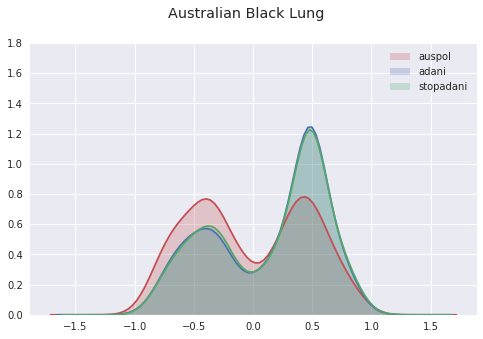

In [2083]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
sns.set_style('whitegrid')
sns.set(color_codes=True)
sns.kdeplot(sentiment_auspol_0, shade=True, color='r', ax=ax, bw=tune)
sns.kdeplot(sentiment_adani_0, shade=True, color='b', ax=ax, bw=tune)
sns.kdeplot(sentiment_stopadani_0, shade=True, color='g', ax=ax, bw=tune)
ax.legend('best',labels=['auspol','adani','stopadani'])
ax.set_ylim([0,1.8])
fig.suptitle('Australian Black Lung');

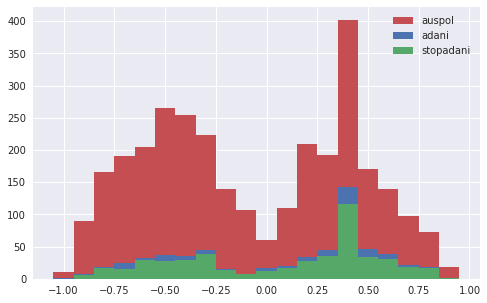

In [1837]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
ax.hist(sentiment_auspol_0, bins=20, range=(-1,1), align='left',label='auspol', color ='r')
ax.hist(sentiment_adani_0, bins=20, range=(-1,1), align='left',label='adani', color ='b')
ax.hist(sentiment_stopadani_0, bins=20, range=(-1,1), align='left', label='stopadani', color='g');
ax.legend()

Cluster 1

In [1829]:
sentiment_solar_1 = cluster_sentiment(1, 'solar', 'compound')
sentiment_ev_1 = cluster_sentiment(1, 'ev', 'compound')
sentiment_battery_1 = cluster_sentiment(1, 'battery', 'compound')
sentiment_oil_1 = cluster_sentiment(1, 'oil', 'compound')

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:518: UserWarning:

You have mixed positional and keyword arguments, some input will be discarded.



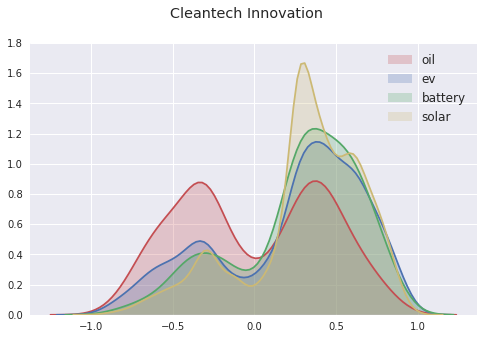

In [2084]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
sns.set_style('whitegrid')
sns.set(color_codes=True)
sns.kdeplot(sentiment_oil_1, shade=True, color='r', ax=ax)
sns.kdeplot(sentiment_ev_1, shade=True, color='b', ax=ax)
sns.kdeplot(sentiment_battery_1, shade=True, color='g', ax=ax)
sns.kdeplot(sentiment_solar_1, shade=True, color='y', ax=ax)
ax.legend('best',labels=['oil','ev','battery','solar'],fontsize='medium')
ax.set_ylim([0,1.8])
fig.suptitle('Cleantech Innovation');

Cluster 2

In [1831]:
sentiment_cop_2 = cluster_sentiment(2, 'cop', 'compound')
sentiment_energyunion_2 = cluster_sentiment(2, 'energyunion', 'compound')
sentiment_climatechange_2 = cluster_sentiment(2, 'climatechange', 'compound')

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:518: UserWarning:

You have mixed positional and keyword arguments, some input will be discarded.



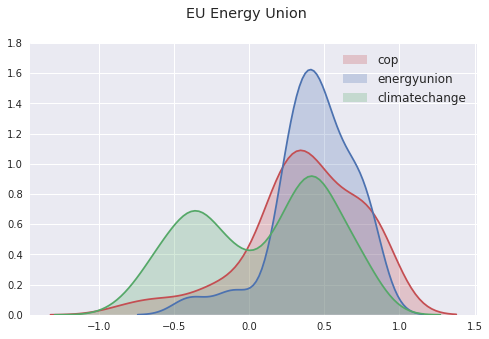

In [2085]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
sns.set_style('whitegrid')
sns.set(color_codes=True)
sns.kdeplot(sentiment_cop_2, shade=True, color='r', ax=ax)
sns.kdeplot(sentiment_energyunion_2, shade=True, color='b', ax=ax)
sns.kdeplot(sentiment_climatechange_2, shade=True, color='g', ax=ax)
ax.legend('best',labels=['cop','energyunion','climatechange'],fontsize='medium')
ax.set_ylim([0,1.8])
fig.suptitle('EU Energy Union');

Cluster 3

In [1833]:
sentiment_trump_3 = cluster_sentiment(3, 'trump', 'compound')
sentiment_gop_3 = cluster_sentiment(3, 'gop', 'compound')
sentiment_charlottesville_3 = cluster_sentiment(3, 'charlottesville', 'compound')

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:518: UserWarning:

You have mixed positional and keyword arguments, some input will be discarded.



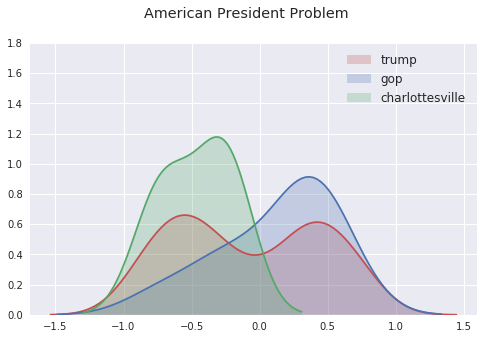

In [2086]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
sns.set_style('whitegrid')
sns.set(color_codes=True)
sns.kdeplot(sentiment_trump_3, shade=True, color='r', ax=ax)
sns.kdeplot(sentiment_gop_3, shade=True, color='b', ax=ax)
sns.kdeplot(sentiment_charlottesville_3, shade=True, color='g', ax=ax)
ax.legend('best',labels=['trump','gop','charlottesville'],fontsize='medium')
ax.set_ylim([0,1.8])
fig.suptitle('American President Problem');

Cluster 4

In [1835]:
sentiment_nuclear_4 = cluster_sentiment(4, 'nuclear', 'compound')
sentiment_uk_4 = cluster_sentiment(4, 'uk', 'compound')
sentiment_brexit_4 = cluster_sentiment(4, 'brexit', 'compound')

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:518: UserWarning:

You have mixed positional and keyword arguments, some input will be discarded.



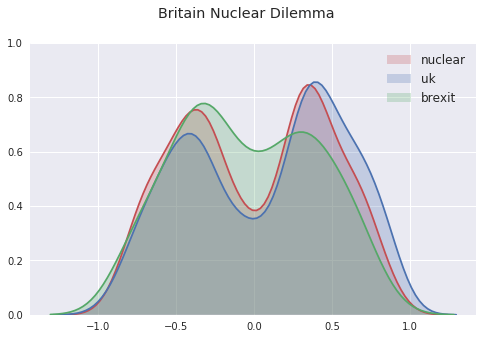

In [2087]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
sns.set_style('whitegrid')
sns.set(color_codes=True)
sns.kdeplot(sentiment_nuclear_4, shade=True, color='r', ax=ax)
sns.kdeplot(sentiment_uk_4, shade=True, color='b', ax=ax)
sns.kdeplot(sentiment_brexit_4, shade=True, color='g', ax=ax)
ax.legend('best',labels=['nuclear','uk','brexit'],fontsize='medium')
ax.set_ylim([0,1.0])
fig.suptitle('Britain Nuclear Dilemma');